In [163]:
%matplotlib inline  
import pdb
import random
import pylab as pl
from scipy.optimize import fmin_bfgs
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from scipy.optimize import fmin_bfgs as opt


In [2]:
def designMatrix(X, order):
    N = len(X)
    phi = np.array([[0.]*order]*N)
    for i in range(N):
        for j in range(order):
            phi[i,j] = X[i]**j
    return phi

In [159]:
def designMatrix2(X, order):
    N = len(X)
    phi = np.array([[0.]*(order)]*N)
    for i in range(N):
        for j in range(order):
            phi[i,j] = np.sin(2*np.pi*(j+1)*X[i])
    return phi

In [160]:
def regressionFit(X, Y, phi):
    phiT = np.transpose(phi)
    a = np.dot(phiT,Y)
    phiInv = inv(np.dot(phiT,phi))
    w = np.dot(phiInv,a)
    return w

In [161]:
# X is an array of N data points (one dimensional for now), that is, NX1
# Y is a Nx1 column vector of data values
# order is the order of the highest order polynomial in the basis functions
def regressionPlot(X, Y, order):
    # constuct the design matrix (Bishop 3.16), the 0th column is just 1s.
    phi = designMatrix2(X, order+1)
    print phi
    # compute the weight vector
    w = regressionFit(X, Y, phi)
    print 'w', w
    print 'error', sse(X, Y, order, w)
    # produce a plot of the values of the function 
    pts = np.linspace(min(X), max(X), 100)
    Yp = np.dot(designMatrix(pts, order+1), w)
    pl.plot(pts, Yp)

[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  6.42787075e-01   9.84807511e-01   8.66026451e-01   3.42022767e-01
   -3.42016863e-01]
 [  9.84807511e-01   3.42022767e-01  -8.66023309e-01  -6.42791888e-01
    6.42782262e-01]
 [  8.66026451e-01  -8.66023309e-01  -6.28318531e-06   8.66029593e-01
   -8.66020168e-01]
 [  3.42022767e-01  -6.42791888e-01   8.66029593e-01  -9.84809693e-01
    9.84805328e-01]
 [ -3.42022767e-01   6.42791888e-01  -8.66029593e-01   9.84809693e-01
   -9.84805328e-01]
 [ -8.66026451e-01   8.66023309e-01   6.28318531e-06  -8.66029593e-01
    8.66020168e-01]
 [ -9.84807511e-01  -3.42022767e-01   8.66023309e-01   6.42791888e-01
   -6.42782262e-01]
 [ -6.42787075e-01  -9.84807511e-01  -8.66026451e-01  -3.42022767e-01
    3.42016863e-01]
 [ -2.44929360e-16  -4.89858720e-16  -7.34788079e-16  -9.79717439e-16
   -1.22464680e-15]]
w [ 0.86482373  0.07019663 -0.01777816  0.3125      0.125     ]
error 11.7811201562


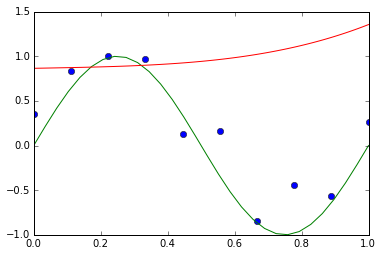

In [162]:
X = [0.000000, 0.111111, 0.222222, 0.333333, 0.444444, 0.555556, 0.666667, 0.777778, 0.888889, 1.00000]
Y = [0.349486, 0.830839, 1.007332, 0.971507, 0.133066, 0.166823, -0.848307, -0.445686, -0.563567, 0.261502]
fig = plt.figure()

plt.plot(X,Y, marker = "o", linestyle = "None")
plt.plot(np.linspace(0,1,30), np.sin(2*np.pi*np.linspace(0,1,30)))
regressionPlot(X,Y,4)
plt.show()
plt.savefig("Figures/Q2/sin.png", dpi = 100)


In [6]:
def polyPredict(X, M, w):
    N = len(X)
    Ypred = np.array([0.]*N)
    for i in range(N):
        for j in range(M+1):
            Ypred[i] += w[j]*X[i]**j
    return Ypred

In [7]:
def sse(X, Y, M, w):
    Ypred = polyPredict(X, M, w)
    sse = 0
    for i in range(len(Ypred)):
        sse += (Ypred[i] - Y[i])**2
    return sse

In [50]:
def sseGrad(X, Y, M, w):
    ret = np.array([0.]*(M+1))
    Ypred = polyPredict(X, M, w)
    for j in range(M+1):
        ret[j]= 0
        for i in range(len(Y)):
            ret[j] -= 2*X[i]**j * (Y[i] - Ypred[i])
    return(ret)

In [12]:
def derivative(f, x, var, epsilon):
    y = np.copy(x)
    y[var] += epsilon
    return ((f(y) - f(x))/epsilon)
def gradient(f,x,epsilon):
    grad = np.array([0.]*len(x))
    for i in range(len(x)):
        grad[i] = derivative(f, x, i, epsilon)
    return grad

In [41]:
M=0
#w = [2.]*(M+1)
w = [5.,2.,-4.,0.]
X = [0.000000, 0.111111, 0.222222, 0.333333, 0.444444, 0.555556, 0.666667, 0.777778, 0.888889, 1.00000]
Y = [0.349486, 0.830839, 1.007332, 0.971507, 0.133066, 0.166823, -0.848307, -0.445686, -0.563567, 0.261502]
sseG = sseGrad(X, Y, M, w)
sseG

[ 0.]


array([ 96.27401])

In [206]:
def f(w):
    M=1
    X = [0.000000, 0.111111, 0.222222, 0.333333, 0.444444, 0.555556, 0.666667, 0.777778, 0.888889, 1.00000]
    Y = [0.349486, 0.830839, 1.007332, 0.971507, 0.133066, 0.166823, -0.848307, -0.445686, -0.563567, 0.261502]
    return sse(X, Y, M, w)
def gradf(w):
    M=1
    X = [0.000000, 0.111111, 0.222222, 0.333333, 0.444444, 0.555556, 0.666667, 0.777778, 0.888889, 1.00000]
    Y = [0.349486, 0.830839, 1.007332, 0.971507, 0.133066, 0.166823, -0.848307, -0.445686, -0.563567, 0.261502]
    return sseGrad(X, Y, M, w)

In [18]:
#w = [2.]*(M+1)
w = [5.,2.,-4.,0.]
numSseGrad = gradient(f, w, 0.01)
numSseGrad

array([ 96.37401,   0.     ,   0.     ,   0.     ])

In [85]:
def gradientDescent(f, gradf, x_ini, step, stop, iterMax):
    x1 = np.copy(x_ini)

    y1 = f(x1)
    y0 = f(x1) + stop + 1
    nbIter = 0
    hist = [np.append(x1,y1)]
    while (abs(y1 - y0) >= stop) & (nbIter <= iterMax):
        nbIter += 1
        grad = gradf(x1)
        x0 = np.copy(x1)
        x1 = np.copy(x0) - step*grad
        y0 = f(x0)
        y1 = f(x1)
        hist = np.append(hist, [np.append(x1,y1)], axis = 0)
        if nbIter%(iterMax/100) == 0:
            print "completion: %d %% and error: %f" %((nbIter*100)/iterMax, hist[-1,-1])
    return(hist)

In [192]:
M = 9
#w = [0., 8., -25., 17]
#w = [3.49446556, 232.412798,  -5322.85881, 48577.6357, -231683.243, 640162.263, -1061997.35, 1042591.31, -557784.187, 125223.931]
#w = [0, 0,  -5322, 48577, -231683, 640162, -1061997, 1042591, -557784, 125223]
w = [1000.] *(M+1)
hist = gradientDescent(f, gradf, w, 0.04, 10**(-9), 300000)
print len(hist)
print hist[-1] 

completion: 1 % and error: 0.758557
completion: 2 % and error: 0.520975
completion: 3 % and error: 0.425859
completion: 4 % and error: 0.387556
completion: 5 % and error: 0.371916
completion: 6 % and error: 0.365324
completion: 7 % and error: 0.362350
completion: 8 % and error: 0.360829
completion: 9 % and error: 0.359898
completion: 10 % and error: 0.359213
completion: 11 % and error: 0.358634
completion: 12 % and error: 0.358108
completion: 13 % and error: 0.357612
completion: 14 % and error: 0.357137
completion: 15 % and error: 0.356678
completion: 16 % and error: 0.356234
completion: 17 % and error: 0.355805
completion: 18 % and error: 0.355388
completion: 19 % and error: 0.354985
completion: 20 % and error: 0.354593
completion: 21 % and error: 0.354214
completion: 22 % and error: 0.353846
completion: 23 % and error: 0.353490
completion: 24 % and error: 0.353144
completion: 25 % and error: 0.352809
completion: 26 % and error: 0.352484
completion: 27 % and error: 0.352168
completion

KeyboardInterrupt: 

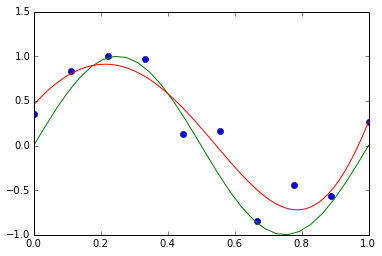

In [122]:
fig = plt.figure()
plt.plot(X,Y, marker = "o", linestyle = "None")
plt.plot(np.linspace(0,1,30), np.sin(2*np.pi*np.linspace(0,1,30)))

w = hist[-1, 0:(M+1)]
pts = np.linspace(min(X), max(X), 100)
Yp = np.dot(designMatrix(pts, M+1), w)
pl.plot(pts, Yp)

X = [0.000000, 0.111111, 0.222222, 0.333333, 0.444444, 0.555556, 0.666667, 0.777778, 0.888889, 1.00000]
Y = [0.349486, 0.830839, 1.007332, 0.971507, 0.133066, 0.166823, -0.848307, -0.445686, -0.563567, 0.261502]

#plt.show()
plt.savefig("Figures/Q2/M9quat.png", dpi = 100)

Optimization terminated successfully.
         Current function value: 2.136541
         Iterations: 3
         Function evaluations: 5
         Gradient evaluations: 5


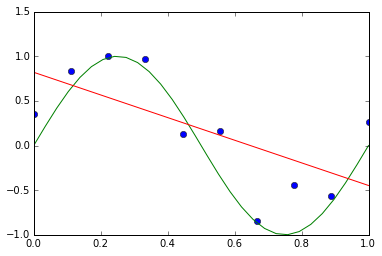

In [207]:
M = 1
#w = [0., 8., -25., 17]
#w = [3.49446556, 232.412798,  -5322.85881, 48577.6357, -231683.243, 640162.263, -1061997.35, 1042591.31, -557784.187, 125223.931]
#w = [0, 0,  -5322, 48577, -231683, 640162, -1061997, 1042591, -557784, 125223]
w = [1000.] *(M+1)
#hist = gradientDescent(f, gradf, w, 0.04, 10**(-6), 30000)
w = opt(f,w, fprime = gradf, gtol = 10**(-9))

fig = plt.figure()
plt.plot(X,Y, marker = "o", linestyle = "None")
plt.plot(np.linspace(0,1,30), np.sin(2*np.pi*np.linspace(0,1,30)))

pts = np.linspace(min(X), max(X), 100)
Yp = np.dot(designMatrix(pts, M+1), w)
pl.plot(pts, Yp)

X = [0.000000, 0.111111, 0.222222, 0.333333, 0.444444, 0.555556, 0.666667, 0.777778, 0.888889, 1.00000]
Y = [0.349486, 0.830839, 1.007332, 0.971507, 0.133066, 0.166823, -0.848307, -0.445686, -0.563567, 0.261502]

#plt.show()
plt.savefig("Figures/Q2/M9quat.png", dpi = 100)